# <span style="color:darkblue"> Lecture 23 - Practicing Time and Plots  </span>

<font size = "5">

In  this lecture we will practice working with time in Python

- There will be a quiz on this lecture


# <span style="color:darkblue"> I. Review of time commands </span>

<font size = "5">

Line plot: $\qquad \qquad \qquad \quad \ $ ``` plt.plot() ```

Parse string column to date: $\ $``` pd.to_datetime(data_column,format)```

Date to string:  $\qquad \qquad \quad \ $ ```.dt.strftime(format)```

Group by time period:
$\qquad \ \ $ ``` pd.Grouper(key='date', freq='m')```

Include group as column: $\quad$ ```.reset_index()```

Difference between periods: $\ $``` .diff() ```

Lag a periods: $\qquad \qquad \quad \ $ ``` .shift(1) ```

Between two periods (bool): $\ $ ```.between("date1","date2")```

Convert wide to long: $\qquad \quad $ ``` pd.melt(...) ```

Convert long to wide: $\qquad \quad $ ``` pd.pivot(...) ```

## <span style="color:darkblue"> II. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)

The quiz will use a time series dataset



<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 21), and sort dataset

(b) Line plots from multiple columns with a legend

(c) Compute growth rates for a time series

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 22

(e) Compute aggregate dataset by time period

(f) Convert a dataset to long format


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime 

financial = pd.read_csv("data_raw/financial.csv")

financial["date"] = pd.to_datetime(financial["date_str"])

financial.dtypes

financial["month_str"] = financial["date"].dt.strftime("%m")
financial["week_str"]  = financial["date"].dt.strftime("%W")
financial["monthname"]   =  financial["date"].dt.strftime("%B")
financial["weekdayname"] =  financial["date"].dt.strftime("%A")
message_monthname =  financial["date"].dt.strftime("This is the month of %B")
message_monthday  =  financial["date"].dt.strftime("The day of the week is %A")
message_yearmonth =  financial["date"].dt.strftime("%Y-%m")

display(message_yearmonth)
display(message_monthname)


# Parse + wild card 
date1 = pd.to_datetime(financial["date_ex1"], format = "%B %d %Y")
date2 = pd.to_datetime(financial["date_ex2"], format = "%A, %Y-%m-%d")

display(date1)

0      2018-04-04
1      2018-04-05
2      2018-04-06
3      2018-04-09
4      2018-04-10
          ...    
1300   2023-03-29
1301   2023-03-30
1302   2023-03-31
1303   2023-04-03
1304   2023-04-04
Name: date_ex1, Length: 1305, dtype: datetime64[ns]

<font size = "5">

Convert to string (a)


- A wildcard ```%``` is used to denote date formats
- Useful when working with text data

$\quad$ <img src="figures/wildcards_fig1.png" alt="drawing" width="300"/>

<font size = "5">

Convert to string (b)

$\quad$ <img src="figures/wildcards_fig2.png" alt="drawing" width="400"/>

In [ ]:
plt.plot("date","sp500_mean",
          data = monthlydata.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Weekly average stock market performance")

financial["date"] = pd.to_datetime(financial["date_str"])
financial         = financial.sort_values("date",ascending = True)

(financial[["date","sp500","djia"]]
    .set_index("date").plot())
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])

In [3]:
financial["diff_sp500"] = financial["sp500"].diff()
financial["lag_sp500"]    = financial["sp500"].shift(1)
financial["growth_sp500"] = financial["diff_sp500"]* 100/financial["lag_sp500"]

display(financial[["sp500","lag_sp500","diff_sp500","growth_sp500"]])

financial[["date","growth_sp500","growth_djia"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Daily percentage change")
plt.title("Change in the S&P 500 and Dow Jones Indexes")
plt.legend(["Standard and Poor's 500","Dow Jones Industrial Index"])



,sp500,lag_sp500,diff_sp500,growth_sp500
0,2644.69,NaN,NaN,NaN
1,2662.84,2644.69,18.15,0.686281
2,2604.47,2662.84,-58.37,-2.192021
3,2613.16,2604.47,8.69,0.333657
4,2656.87,2613.16,43.71,1.672687
...,...,...,...,...
1300,4027.81,3971.27,56.54,1.423726
1301,4050.83,4027.81,23.02,0.571526
1302,4109.31,4050.83,58.48,1.443655
1303,4124.51,4109.31,15.20,0.369892


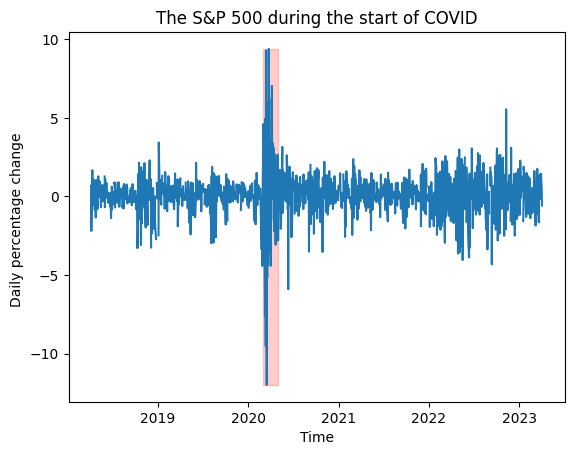

In [4]:
subset_between = financial.query('date.between("2020-03-01","2020-05-01")')

financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")
financial["bool_example"] = financial["growth_sp500"] > 5

# This is the basic plot 
plt.plot("date", "growth_sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = financial["growth_sp500"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()


Text(0.5, 1.0, 'Weekly average stock market performance')

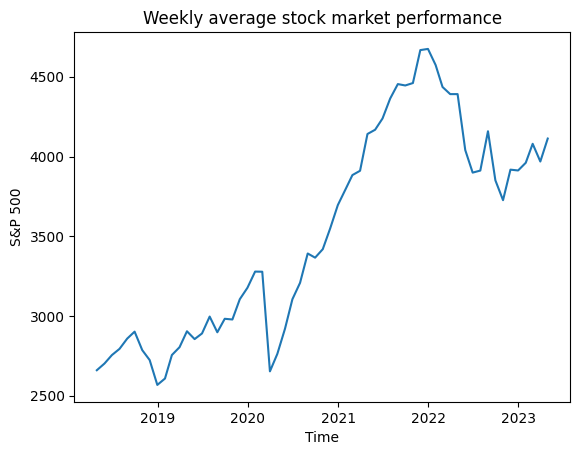

In [5]:
month_config = pd.Grouper(key='date', freq='m')

monthlydata = (financial
               .groupby(month_config) 
               .agg(sp500_mean = ("sp500","mean"))
               .reset_index())

plt.plot("date","sp500_mean",
          data = monthlydata.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Weekly average stock market performance")

In [6]:
financial_long = pd.melt(financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars='date',
                         value_vars=['sp500','djia'])

display(financial_long)



,date,portfolio_type,portfolio_value
0,2018-04-04,sp500,2644.69
1,2018-04-05,sp500,2662.84
2,2018-04-06,sp500,2604.47
3,2018-04-09,sp500,2613.16
4,2018-04-10,sp500,2656.87
...,...,...,...
2605,2023-03-29,djia,32717.60
2606,2023-03-30,djia,32859.03
2607,2023-03-31,djia,33274.15
2608,2023-04-03,djia,33601.15


<font size = "5">

Wide to long

$\quad$ <img src="figures/melt_fig.png" alt="drawing" width="550"/>